# Using decision Trees to predict delimited clusters of a class in a dataset

### Exercice 1

In this exercise, we will use the decision tree algorithm to predict the clusters of a dataset. The dataset is composed of 2 features and 2 classes. One classe is delimited by a two squares. The other class represents the rest of the plane. The goal is to use the decision tree algorithm to predict the clusters of the dataset.

First we define the model: \
for each point i, $y_i = min(|x_i - \alpha_1|_{\infty}, |x_i - \alpha_2|_{\infty}) - 1 + \epsilon_i $    with $\epsilon_i \sim \mathcal{N}(0, 0.01)$ and $\alpha_1 = (0, 2)$ and $\alpha_2 = (0, -2)$. 
- If $y_i > 0$ then the point belongs to the first class.
- If $y_i \leq 0$ then the point belongs to the second class.


**Questions**:
1. Generate a dataset of 10000 points using the model defined above and assuming that $x_i$ is a gaussian vector of mean 0 and covariance matrix $\begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}$. 
2. Plot the dataset.
3. Train the decision tree on the dataset.
4. Plot the decision boundary of the decision tree.
5. Using a plane grid, plot the decision of the decision tree on the plane. Compare the decision of the decision tree with the true clusters.
6. Make a conclusion.



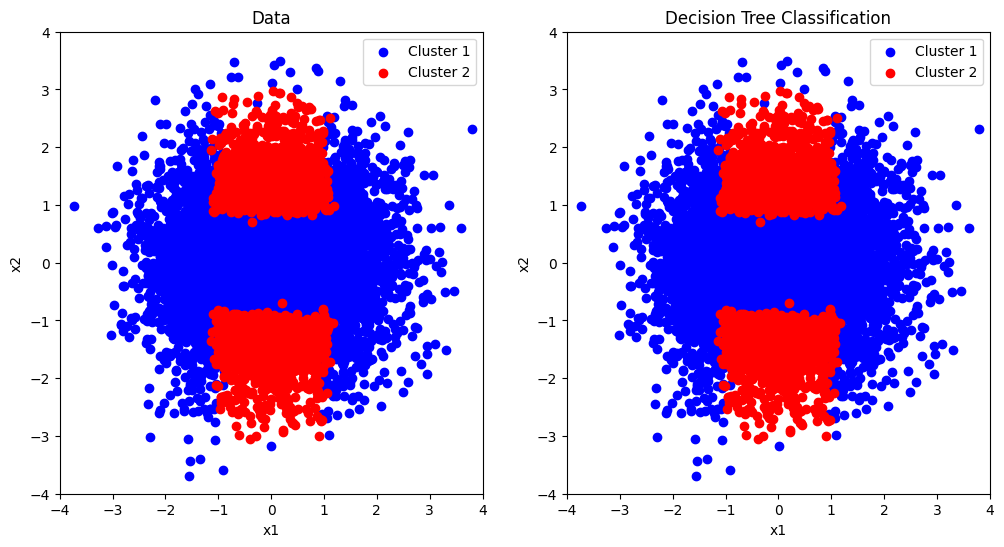

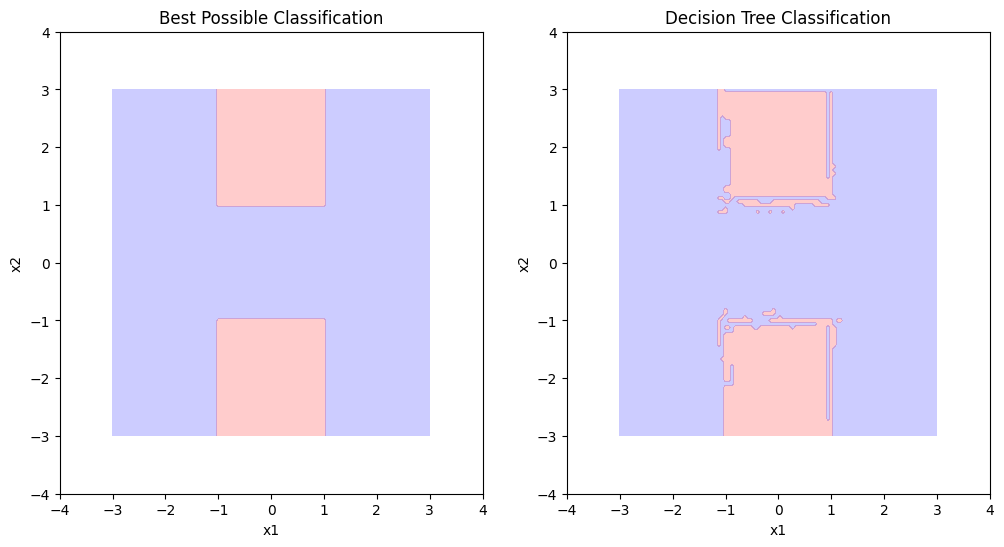

In [1]:
# imports 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# set the random seed
np.random.seed(0)

# number of samples
n = 10000

# define clusters centers
alpha_1 = np.array([0, 2])
alpha_2 = np.array([0, -2])

# generate data
x = np.random.randn(n, 2)
epsilon = np.random.randn(n)
y = (np.concat((np.abs(x - alpha_1).max(axis=-1)[:, None], np.abs(x - alpha_2).max(axis=-1)[:, None]), axis=-1)).min(axis=-1) - 1 + 0.1 * epsilon
labels = y > 0

# fit a decision tree
clf = DecisionTreeClassifier()
clf.fit(x, labels)

# predictions
y_pred = clf.predict(x)

# plot the data vs the decision tree classification
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# plot the data
axs[0].scatter(x[labels, 0], x[labels, 1], color='blue', label='Cluster 1')
axs[0].scatter(x[~labels, 0], x[~labels, 1], color='red', label='Cluster 2')
axs[0].set_title('Data')
axs[0].set_xlabel('x1')
axs[0].set_ylabel('x2')
axs[0].legend()

# set limits
axs[0].set_xlim(-4, 4)
axs[0].set_ylim(-4, 4)

# plot the decision tree classification
axs[1].scatter(x[y_pred, 0], x[y_pred, 1], color='blue', label='Cluster 1')
axs[1].scatter(x[~y_pred, 0], x[~y_pred, 1], color='red', label='Cluster 2')
axs[1].set_title('Decision Tree Classification')
axs[1].set_xlabel('x1')
axs[1].set_ylabel('x2')
axs[1].legend()

# set limits
axs[1].set_xlim(-4, 4)
axs[1].set_ylim(-4, 4)



# plot the generalization of the classification using plane grid coloration
# generate a grid
n_grid = 100
x1x1 = np.linspace(-3, 3, n_grid)
x2x2 = np.linspace(-3, 3, n_grid)
X1, X2 = np.meshgrid(x1x1, x2x2)
X = np.c_[X1.ravel(), X2.ravel()]

# predict the labels
y_best = ((np.concat((np.abs(X - alpha_1).max(axis=-1)[:, None], np.abs(X - alpha_2).max(axis=-1)[:, None]), axis=-1)).min(axis=-1) - 1 > 0) * 1
y_pred = clf.predict(X)

# plot the decision tree classification vs the best possible classification
fig_generalization, axs_generalization = plt.subplots(1, 2, figsize=(12, 6))

# plot the best possible classification
axs_generalization[0].contourf(X1, X2, y_best.reshape(n_grid, n_grid), levels=[-0.5, 0.5, 1.5], colors=['red', 'blue'], alpha=0.2)
axs_generalization[0].set_title('Best Possible Classification')
axs_generalization[0].set_xlabel('x1')
axs_generalization[0].set_ylabel('x2')

# set limits
axs_generalization[0].set_xlim(-4, 4)
axs_generalization[0].set_ylim(-4, 4)

# plot the decision tree classification
axs_generalization[1].contourf(X1, X2, y_pred.reshape(n_grid, n_grid), levels=[-0.5, 0.5, 1.5], colors=['red', 'blue'], alpha=0.2)
axs_generalization[1].set_title('Decision Tree Classification')
axs_generalization[1].set_xlabel('x1')
axs_generalization[1].set_ylabel('x2')

# set limits
axs_generalization[1].set_xlim(-4, 4)
axs_generalization[1].set_ylim(-4, 4)

plt.show()

# Random Forests to predict delimited clusters of a class in a dataset

### Exercice 2

To improve the prediction of the clusters, we will use the random forest algorithm. The goal is to avoid overfitting and to improve the generalization of the model.

**Questions**:
1. Train a random forest (with 200 trees) on the dataset.
2. Plot the decision boundary of the random forest.
3. Using a plane grid, plot the decision of the random forest on the plane. Compare the decision of the random forest with the true clusters.
4. Make a conclusion.

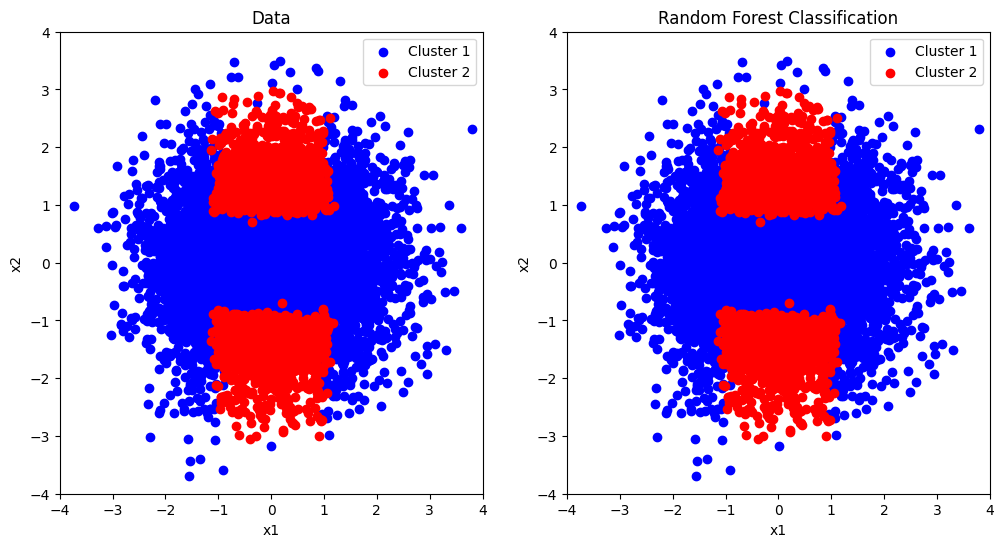

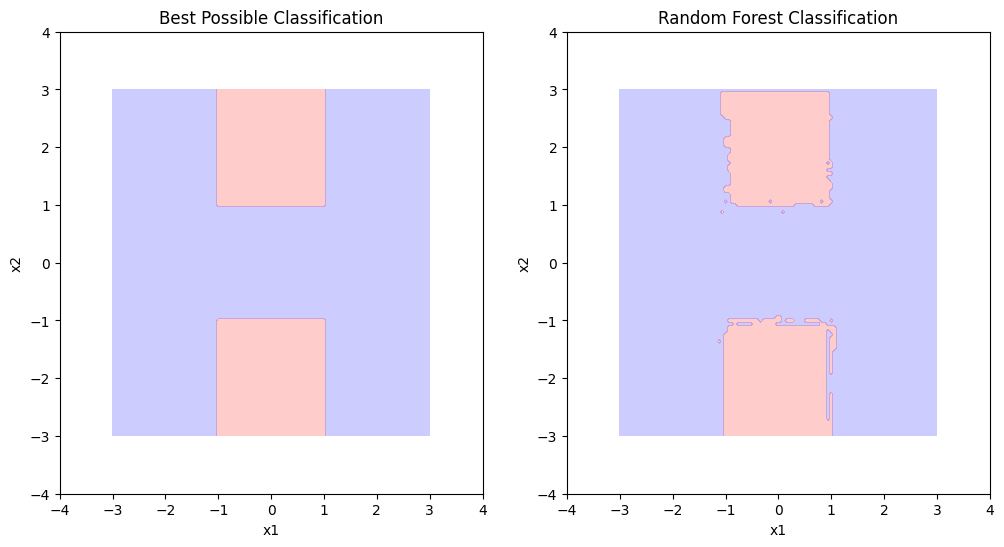

In [2]:
# import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier


# fit a random forest
clf = RandomForestClassifier(n_estimators=200)
clf.fit(x, labels)

# predictions
y_pred = clf.predict(x)

# plot the data vs the random forest classification
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# plot the data
axs[0].scatter(x[labels, 0], x[labels, 1], color='blue', label='Cluster 1')
axs[0].scatter(x[~labels, 0], x[~labels, 1], color='red', label='Cluster 2')
axs[0].set_title('Data')
axs[0].set_xlabel('x1')
axs[0].set_ylabel('x2')
axs[0].legend()

# set limits
axs[0].set_xlim(-4, 4)
axs[0].set_ylim(-4, 4)

# plot the random forest classification
axs[1].scatter(x[y_pred, 0], x[y_pred, 1], color='blue', label='Cluster 1')
axs[1].scatter(x[~y_pred, 0], x[~y_pred, 1], color='red', label='Cluster 2')
axs[1].set_title('Random Forest Classification')
axs[1].set_xlabel('x1')
axs[1].set_ylabel('x2')
axs[1].legend()

# set limits
axs[1].set_xlim(-4, 4)
axs[1].set_ylim(-4, 4)

# plot the generalization of the classification using plane grid coloration
# predict the labels
y_best = ((np.concat((np.abs(X - alpha_1).max(axis=-1)[:, None], np.abs(X - alpha_2).max(axis=-1)[:, None]), axis=-1)).min(axis=-1) - 1 > 0) * 1
y_pred = clf.predict(X)

# plot the random forest classification vs the best possible classification
fig_generalization, axs_generalization = plt.subplots(1, 2, figsize=(12, 6))

# plot the best possible classification
axs_generalization[0].contourf(X1, X2, y_best.reshape(n_grid, n_grid), levels=[-0.5, 0.5, 1.5], colors=['red', 'blue'], alpha=0.2)
axs_generalization[0].set_title('Best Possible Classification')
axs_generalization[0].set_xlabel('x1')
axs_generalization[0].set_ylabel('x2')

# set limits
axs_generalization[0].set_xlim(-4, 4)
axs_generalization[0].set_ylim(-4, 4)

# plot the random forest classification
axs_generalization[1].contourf(X1, X2, y_pred.reshape(n_grid, n_grid), levels=[-0.5, 0.5, 1.5], colors=['red', 'blue'], alpha=0.2)
axs_generalization[1].set_title('Random Forest Classification')
axs_generalization[1].set_xlabel('x1')
axs_generalization[1].set_ylabel('x2')

# set limits
axs_generalization[1].set_xlim(-4, 4)
axs_generalization[1].set_ylim(-4, 4)

plt.show()

# Use boosting to predict delimited clusters of a class in a dataset

### Exercice 3 

To improve the prediction of the clusters, we will use the boosting algorithm. The goal is to avoid overfitting and to improve the generalization of the model.

**Questions**:
1. Train a boosting (with 200 trees) on the dataset.
2. Plot the decision boundary of the boosting.
3. Using a plane grid, plot the decision of the boosting on the plane. Compare the decision of the boosting with the true clusters.
4. Make a conclusion.




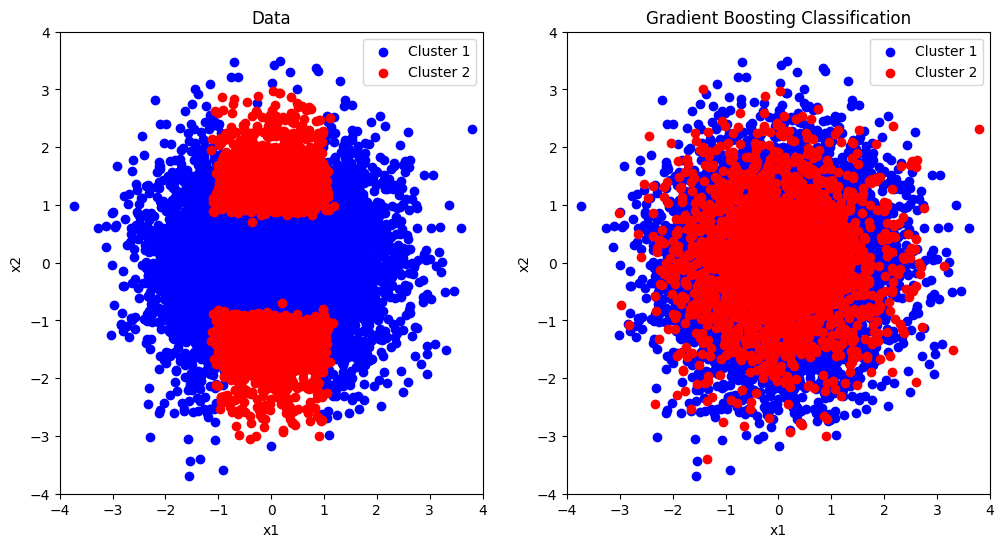

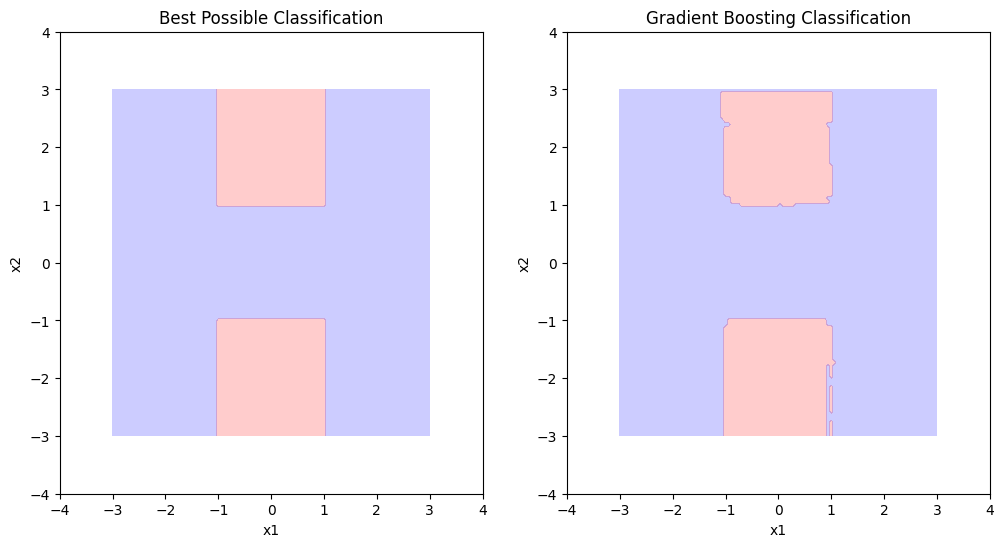

In [3]:
# import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier


# fit a gradient boosting
clf = GradientBoostingClassifier(n_estimators=200)
clf.fit(x, labels)

# predictions
clf.predict(x)

# plot the data vs the gradient boosting classification
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# plot the data
axs[0].scatter(x[labels, 0], x[labels, 1], color='blue', label='Cluster 1')
axs[0].scatter(x[~labels, 0], x[~labels, 1], color='red', label='Cluster 2')
axs[0].set_title('Data')
axs[0].set_xlabel('x1')
axs[0].set_ylabel('x2')
axs[0].legend()

# set limits
axs[0].set_xlim(-4, 4)
axs[0].set_ylim(-4, 4)

# plot the gradient boosting classification
axs[1].scatter(x[y_pred, 0], x[y_pred, 1], color='blue', label='Cluster 1')
axs[1].scatter(x[~y_pred, 0], x[~y_pred, 1], color='red', label='Cluster 2')
axs[1].set_title('Gradient Boosting Classification')
axs[1].set_xlabel('x1')
axs[1].set_ylabel('x2')
axs[1].legend()

# set limits
axs[1].set_xlim(-4, 4)
axs[1].set_ylim(-4, 4)

# plot the generalization of the classification using plane grid coloration
# predict the labels
y_best = ((np.concat((np.abs(X - alpha_1).max(axis=-1)[:, None], np.abs(X - alpha_2).max(axis=-1)[:, None]), axis=-1)).min(axis=-1) - 1 > 0) * 1
y_pred = clf.predict(X)

# plot the gradient boosting classification vs the best possible classification
fig_generalization, axs_generalization = plt.subplots(1, 2, figsize=(12, 6))

# plot the best possible classification
axs_generalization[0].contourf(X1, X2, y_best.reshape(n_grid, n_grid), levels=[-0.5, 0.5, 1.5], colors=['red', 'blue'], alpha=0.2)
axs_generalization[0].set_title('Best Possible Classification')
axs_generalization[0].set_xlabel('x1')
axs_generalization[0].set_ylabel('x2')

# set limits
axs_generalization[0].set_xlim(-4, 4)
axs_generalization[0].set_ylim(-4, 4)

# plot the gradient boosting classification
axs_generalization[1].contourf(X1, X2, y_pred.reshape(n_grid, n_grid), levels=[-0.5, 0.5, 1.5], colors=['red', 'blue'], alpha=0.2)
axs_generalization[1].set_title('Gradient Boosting Classification')
axs_generalization[1].set_xlabel('x1')
axs_generalization[1].set_ylabel('x2')

# set limits
axs_generalization[1].set_xlim(-4, 4)
axs_generalization[1].set_ylim(-4, 4)

plt.show()